In [1]:
#Libraries to manage dataframes and data
import pandas as pd
import numpy as np

#Libraries to web scrapping
from bs4 import BeautifulSoup
from urllib import request

#Library to perform regular expressions
import re

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Geographical locations
from geopy.geocoders import Nominatim

#To extract NNs and manage natural language
import nltk

#To improve loops
from tqdm import tqdm

In [2]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')

In [3]:
"""site_url = 'https://www.numbeo.com/cost-of-living/in/Singapore'
r = request.urlopen(site_url)
site_content = r.read().decode('utf-8')
s = BeautifulSoup(site_content, 'html.parser')"""

"site_url = 'https://www.numbeo.com/cost-of-living/in/Singapore'\nr = request.urlopen(site_url)\nsite_content = r.read().decode('utf-8')\ns = BeautifulSoup(site_content, 'html.parser')"

In [4]:
file_name = 'Data/Cost of Living in Singapore. Nov 2019. Prices in Singapore.html'
with open(file_name,encoding="utf8") as f:
    s = BeautifulSoup(f, 'html.parser')

In [5]:
eses = s.find_all('td',{'class':'priceValue'})
priceValues = []
names = []
for ese in eses:
    try:
        tempese = ese.text[:-1]
        priceValues.append(float(tempese))
        
    except ValueError:
        tempese = re.sub(',','',ese.text[:-1])
        priceValues.append(float(tempese))
        
    name = re.sub(r"[^A-Z+a-z]",' ',ese.parent.text).strip()
    names.append(name)

In [6]:
df = pd.DataFrame({'Venues':names,'Values':priceValues})
display(df.head())
display(df.tail())

Venues  Values
0                       Meal  Inexpensive Restaurant    8.85
1  Meal for   People  Mid range Restaurant  Three...   44.24
2      McMeal at McDonalds  or Equivalent Combo Meal    5.88
3                   Domestic Beer      liter draught    7.40
4                   Imported Beer       liter bottle    8.12

Venues    Values
50           Apartment    bedrooms  Outside of Centre   2179.54
51  Price per Square Meter to Buy Apartment in Cit...  19268.92
52  Price per Square Meter to Buy Apartment Outsid...  10125.44
53              Average Monthly Net Salary  After Tax   3204.97
54  Mortgage Interest Rate in Percentages      Yea...      2.40

In [7]:
df2 = df.iloc[0:47]
df2.tail()

Venues    Values
42  International Primary School  Yearly for   Child  20278.05
43               Pair of Jeans  Levis     Or Similar     69.23
44          Summer Dress in a Chain Store  Zara  H M     37.64
45             Pair of Nike Running Shoes  Mid Range     89.43
46                Pair of Men Leather Business Shoes    106.87

In [8]:
list_nn = []
tags = []
for i in tqdm(range(len(df2.Venues) )):
    list_gn = nltk.word_tokenize(df2.Venues.array[i])
    tag = nltk.pos_tag(list_gn)
    for j in range(len(tag)):
        if ((tag[j][1] == 'NNP') or tag[j][1] == 'NNS' or tag[j][1] == 'NN') and (tag[j][0] not in [
            'McMeal','Men','International','Bottle','Ticket','Prepaid','Local','Primary','Summer','way','Preschool','Pair']) :
            list_nn.append(tag[j][0])
            break;
        elif j==(len(tag)-1):
            list_nn.append('No NN')
            break;
    tags.append(tag)

            

100%|█████████████████████████████████████████| 47/47 [00:00<00:00, 288.74it/s]


In [9]:
df2['NN'] = list_nn
df2['tags'] = tags

C:\Users\dpine\Miniconda3\envs\ibm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dpine\Miniconda3\envs\ibm\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


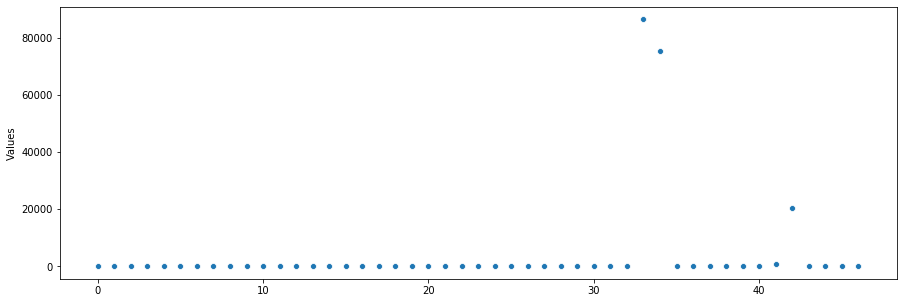

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df2.index,y='Values',data=df2);

In [11]:
df2 = df2.loc[df2.Values<800]

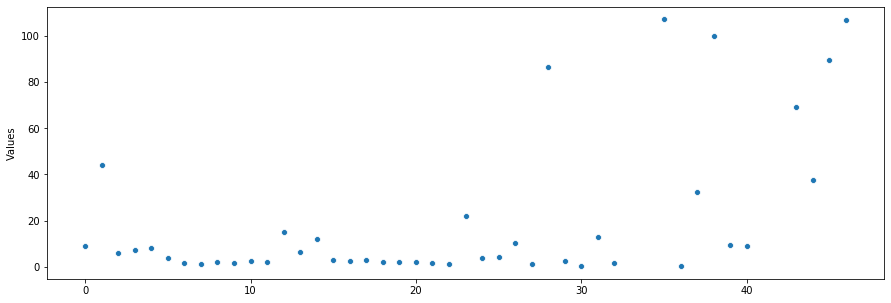

In [12]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df2.index,y='Values',data=df2);

In [13]:
df3 = df2[['Venues','NN','tags','Values']].copy()

In [14]:
df3.head()

Venues         NN  \
0                       Meal  Inexpensive Restaurant       Meal   
1  Meal for   People  Mid range Restaurant  Three...       Meal   
2      McMeal at McDonalds  or Equivalent Combo Meal  McDonalds   
3                   Domestic Beer      liter draught       Beer   
4                   Imported Beer       liter bottle       Beer   

                                                tags  Values  
0  [(Meal, NNP), (Inexpensive, NNP), (Restaurant,...    8.85  
1  [(Meal, NNP), (for, IN), (People, NNP), (Mid, ...   44.24  
2  [(McMeal, NN), (at, IN), (McDonalds, NNP), (or...    5.88  
3  [(Domestic, JJ), (Beer, NNP), (liter, NN), (dr...    7.40  
4  [(Imported, VBN), (Beer, NNP), (liter, RBR), (...    8.12

In [15]:
pd.set_option('display.max_colwidth', -1)

In [16]:
df3_grouped = df3.loc[(df3.NN !='No NN') & (df3.NN != 'min')].groupby('NN',as_index=False).agg({ 'Venues': lambda x: ', '.join(x),'Values':'mean'})
df3_grouped.head()

NN  \
0  Apples       
1  Banana       
2  Beef         
3  Beer         
4  Cappuccino   

                                                                                                                                  Venues  \
0  Apples   kg                                                                                                                             
1  Banana   kg                                                                                                                             
2  Beef Round   kg   or Equivalent Back Leg Red Meat                                                                                       
3  Domestic Beer      liter draught, Imported Beer       liter bottle, Domestic Beer      liter bottle, Imported Beer       liter bottle   
4  Cappuccino  regular                                                                                                                     

    Values  
0  3.1000   
1  2.3900   
2  12.1800  
3  5.8125   
4  3.9600

In [17]:
df3_grouped.to_csv('Data/dfGrouped.csv',index=False)

In [18]:
"""site_url = 'https://en.wikipedia.org/wiki/List_of_places_in_Singapore'
r = request.urlopen(site_url)
site_content = r.read().decode('utf-8')
s = BeautifulSoup(site_content, 'html.parser')"""

"site_url = 'https://en.wikipedia.org/wiki/List_of_places_in_Singapore'\nr = request.urlopen(site_url)\nsite_content = r.read().decode('utf-8')\ns = BeautifulSoup(site_content, 'html.parser')"

In [19]:
file_name = 'Data/List of places in Singapore - Wikipedia.html'
with open(file_name,encoding="utf8") as f:
    s = BeautifulSoup(f, 'html.parser')

In [20]:
ids = []
for a in range(1,55):
    ids.append(f'cite_ref-{a}')

In [21]:
eses = s.find_all('sup',{'class':'reference'})
names = []
for ese in eses:
    names.append(ese.parent.text.split("[")[0])
names = pd.DataFrame({'names':names})
names.head()

names
0  Bishan       
1  Bukit Merah  
2  Bukit Timah  
3  Downtown Core
4  Geylang

In [22]:
geolocator = Nominatim(user_agent="foursquare_agent")

In [23]:
Latitude = []
Longitude = []
for address in tqdm(names.names):
    
    location = geolocator.geocode(address+',Singapore')
    try:
        Latitude.append(location.latitude)
        Longitude.append(location.longitude)
    except:
        Latitude.append('No encontrado')
        Longitude.append('No encontrado')
        
    

names['Latitude'] = Latitude
names['Longitude'] = Longitude
names.head()

100%|██████████████████████████████████████████| 55/55 [00:42<00:00,  1.29it/s]


names       Latitude      Longitude
0  Bishan         1.35145        103.848      
1  Bukit Merah    1.28063        103.831      
2  Bukit Timah    1.35469        103.776      
3  Downtown Core  No encontrado  No encontrado
4  Geylang        1.31819        103.887

In [24]:
names = names.loc[(names.Latitude!='No encontrado') & (names.Longitude !='No encontrado')]
names.head()

names Latitude Longitude
0  Bishan       1.35145  103.848 
1  Bukit Merah  1.28063  103.831 
2  Bukit Timah  1.35469  103.776 
4  Geylang      1.31819  103.887 
5  Kallang      1.31076  103.866

In [25]:
names.to_csv('Data/names.csv',index=False)